In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_sensor = pd.read_csv('uci-secom.csv')

In [3]:
df_sensor.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df_sensor.shape

(1567, 592)

In [5]:
df_sensor.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [6]:
for i in df_sensor.columns:
    if df_sensor[i].isnull().sum()!=0:
        print("Column", i, "has", df_sensor[i].isnull().sum(), " NaN values with", format((df_sensor[i].isnull().sum()/1567*100),".2f"),  "%") 

Column 0 has 6  NaN values with 0.38 %
Column 1 has 7  NaN values with 0.45 %
Column 2 has 14  NaN values with 0.89 %
Column 3 has 14  NaN values with 0.89 %
Column 4 has 14  NaN values with 0.89 %
Column 5 has 14  NaN values with 0.89 %
Column 6 has 14  NaN values with 0.89 %
Column 7 has 9  NaN values with 0.57 %
Column 8 has 2  NaN values with 0.13 %
Column 9 has 2  NaN values with 0.13 %
Column 10 has 2  NaN values with 0.13 %
Column 11 has 2  NaN values with 0.13 %
Column 12 has 2  NaN values with 0.13 %
Column 13 has 3  NaN values with 0.19 %
Column 14 has 3  NaN values with 0.19 %
Column 15 has 3  NaN values with 0.19 %
Column 16 has 3  NaN values with 0.19 %
Column 17 has 3  NaN values with 0.19 %
Column 18 has 3  NaN values with 0.19 %
Column 19 has 10  NaN values with 0.64 %
Column 21 has 2  NaN values with 0.13 %
Column 22 has 2  NaN values with 0.13 %
Column 23 has 2  NaN values with 0.13 %
Column 24 has 2  NaN values with 0.13 %
Column 25 has 2  NaN values with 0.13 %
Colu

Column 406 has 8  NaN values with 0.51 %
Column 407 has 8  NaN values with 0.51 %
Column 408 has 5  NaN values with 0.32 %
Column 409 has 6  NaN values with 0.38 %
Column 410 has 7  NaN values with 0.45 %
Column 411 has 14  NaN values with 0.89 %
Column 412 has 14  NaN values with 0.89 %
Column 413 has 14  NaN values with 0.89 %
Column 414 has 14  NaN values with 0.89 %
Column 415 has 14  NaN values with 0.89 %
Column 416 has 9  NaN values with 0.57 %
Column 417 has 2  NaN values with 0.13 %
Column 418 has 2  NaN values with 0.13 %
Column 419 has 2  NaN values with 0.13 %
Column 420 has 2  NaN values with 0.13 %
Column 421 has 2  NaN values with 0.13 %
Column 422 has 3  NaN values with 0.19 %
Column 423 has 3  NaN values with 0.19 %
Column 424 has 3  NaN values with 0.19 %
Column 425 has 3  NaN values with 0.19 %
Column 426 has 3  NaN values with 0.19 %
Column 427 has 3  NaN values with 0.19 %
Column 428 has 10  NaN values with 0.64 %
Column 430 has 2  NaN values with 0.13 %
Column 431

In [7]:
s=0
dropped_col=[]
df_ver2=df_sensor.copy()
for j in df_sensor.columns:
    if (df_sensor[j].isnull().sum())/1567*100>=60:
        s=s+1
        df_ver2.drop([j], axis=1, inplace=True)
        dropped_col.append(j)

In [8]:
print(dropped_col)

['85', '109', '110', '111', '157', '158', '220', '244', '245', '246', '292', '293', '358', '382', '383', '384', '492', '516', '517', '518', '578', '579', '580', '581']


In [9]:
print("Shape after dropping is", df_ver2.shape)

Shape after dropping is (1567, 568)


In [10]:
df_ver2= df_ver2.replace(np.NaN, 0)

In [11]:
df_ver2.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 568, dtype: int64

In [12]:
df_ver2['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [13]:
df_ver2['Pass/Fail']=df_ver2['Pass/Fail'].replace({-1: 1, 1:0})

In [14]:
df_ver2.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


<Figure size 1000x1000 with 0 Axes>

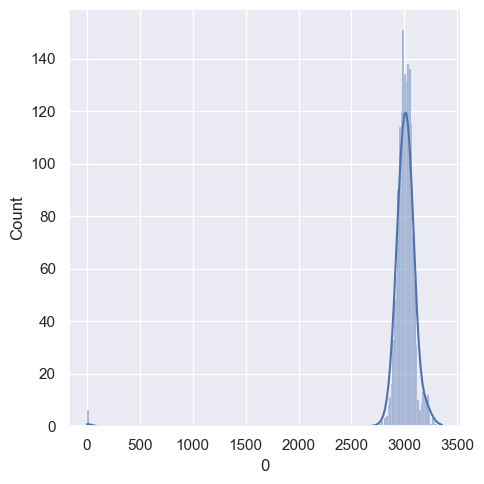

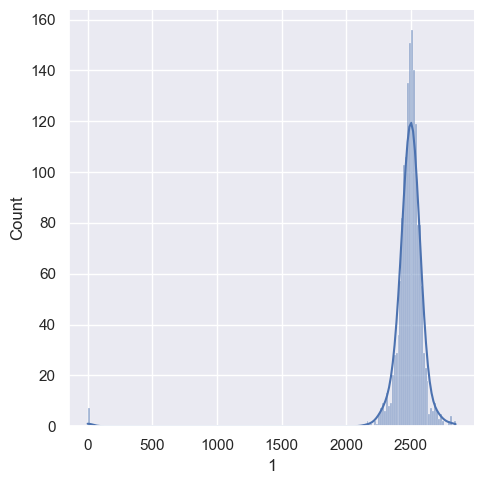

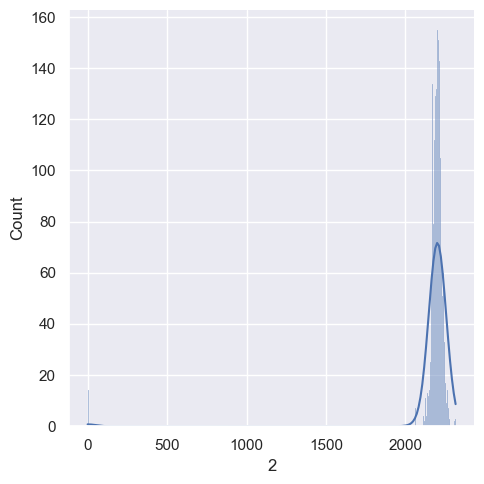

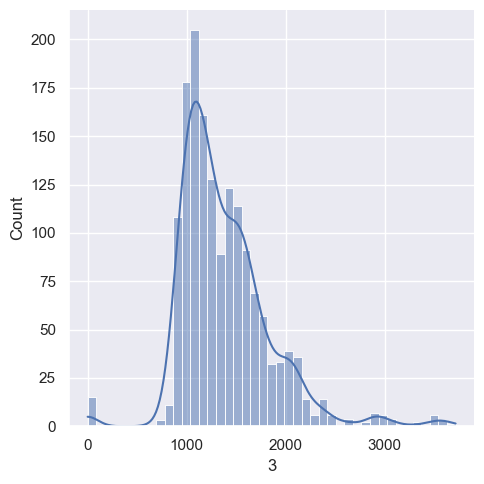

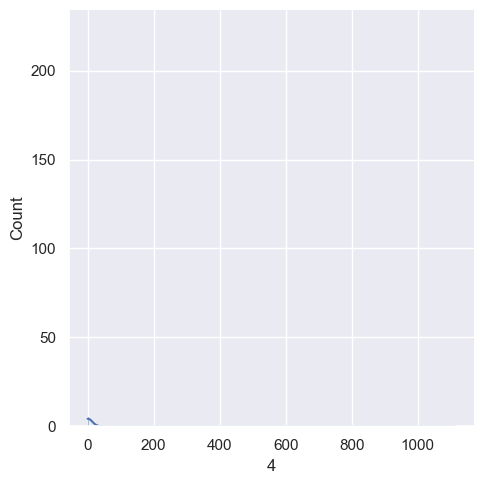

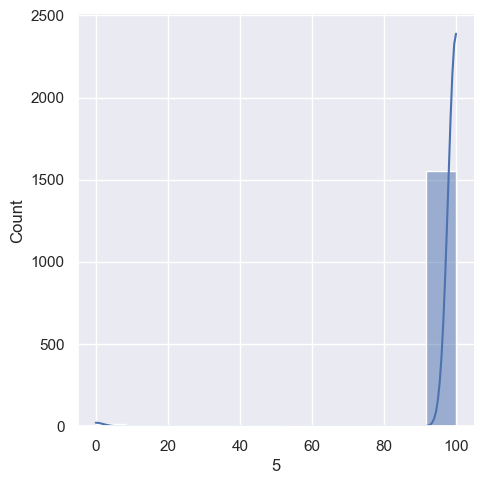

In [15]:
fig = plt.figure(figsize=(10,10))

for col in ['0','1','2','3','4','5']:
    sns.displot(data=df_ver2[col],kde= True)
    plt.show()

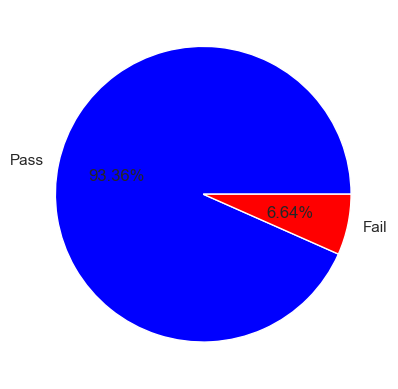

In [16]:
labels = ['Pass', 'Fail']
size = df_ver2['Pass/Fail'].value_counts()
colors = ['blue', 'red']

plt.style.use('seaborn-deep')
plt.pie(size, labels =labels, colors = colors, autopct = "%.2f%%")
plt.show()

### TIME SERIES ANALYSIS OF SENSORS TO BE CONDUCTED LATER 

In [17]:
from datetime import date
df_ver2['Time'] = pd.to_datetime(df_ver2.Time)
df_ver2['date'] = pd.to_datetime(df_ver2['Time']).dt.date
df_ver2['time'] = pd.to_datetime(df_ver2['Time']).dt.time

In [18]:
df_ver2.head()

,Time,0,1,2,3,4,5,6,7,8,...,583,584,585,586,587,588,589,Pass/Fail,date,time
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,1,2008-07-19,11:55:00
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1,2008-07-19,12:32:00
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0,2008-07-19,13:17:00
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1,2008-07-19,14:43:00
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1,2008-07-19,15:22:00


df_ver2['Year']=df_ver2['Time'].dt.year
df_ver2['month'] = df_ver2['Time'].dt.month
df_ver2['day'] = df_ver2['Time'].dt.day
df_ver2['hour'] = df_ver2['Time'].dt.hour
df_ver2['minute'] = df_ver2['Time'].dt.minute

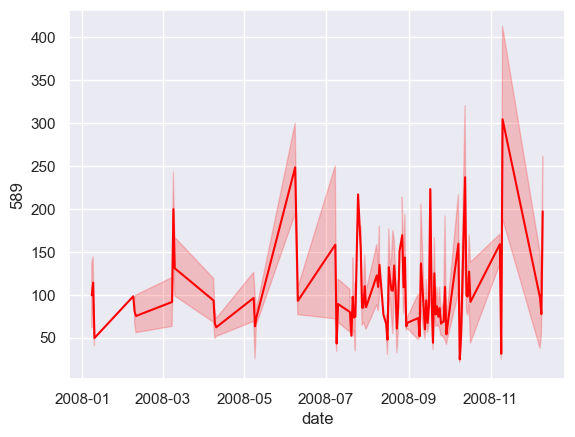

In [19]:
sns.lineplot(
                       data=df_ver2,
                       x=df_ver2['date'],
                       y=df_ver2['589'],
                       color='red'
                      
                       )
plt.show()

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(df_ver2, 0.75)
df_ver2.drop(corr_features, axis=1, inplace=True)

In [22]:
print("After dropping multicollinear columns, shape of dataset is", df_ver2.shape)

After dropping multicollinear columns, shape of dataset is (1567, 314)


In [23]:
def correlation_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [24]:
corr_cols = correlation_target(df_ver2, 'Pass/Fail', 0.1)
df_ver2.drop(corr_cols, axis=1, inplace=True)
print("After dropping irrelevant columns, shape of dataset is", df_ver2.shape)

After dropping irrelevant columns, shape of dataset is (1567, 124)


In [25]:
df_final=df_ver2.drop(['Time'], axis=1)

In [26]:
df_final.head()

,13,21,28,52,59,97,103,129,141,149,...,533,534,535,536,537,538,589,Pass/Fail,date,time
0,0.0,-5419.00,64.2333,0.0,-1.7264,0.0,-0.0042,-0.0473,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1,2008-07-19,11:55:00
1,0.0,-5441.50,68.4222,0.0,0.8073,0.0,-0.0045,-0.0946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,208.2045,1,2008-07-19,12:32:00
2,0.0,-5447.75,67.1333,0.0,23.8245,0.0,-0.0026,-0.1892,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.8602,0,2008-07-19,13:17:00
3,0.0,-5468.25,62.9333,0.0,24.3791,0.0,-0.0059,0.2838,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.8432,1,2008-07-19,14:43:00
4,0.0,-5476.25,62.8333,0.0,-12.2945,0.0,-0.0045,-0.5677,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.8432,1,2008-07-19,15:22:00


In [27]:
x = df_final.iloc[:,:120]
y = df_final["Pass/Fail"]

In [28]:
x.head()

,13,21,28,52,59,97,103,129,141,149,...,530,531,532,533,534,535,536,537,538,589
0,0.0,-5419.00,64.2333,0.0,-1.7264,0.0,-0.0042,-0.0473,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0,-5441.50,68.4222,0.0,0.8073,0.0,-0.0045,-0.0946,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.2045
2,0.0,-5447.75,67.1333,0.0,23.8245,0.0,-0.0026,-0.1892,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.8602
3,0.0,-5468.25,62.9333,0.0,24.3791,0.0,-0.0059,0.2838,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.8432
4,0.0,-5476.25,62.8333,0.0,-12.2945,0.0,-0.0045,-0.5677,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.8432


In [29]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Pass/Fail, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 120)
shape of x_test:  (314, 120)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
x_train

array([[ 0.        ,  0.6082225 ,  0.55854973, ...,  0.        ,
         0.        , -0.7152762 ],
       [ 0.        ,  0.58464998,  1.04674327, ...,  0.        ,
         0.        , -0.37181322],
       [ 0.        ,  1.13951081,  0.9396357 , ...,  0.        ,
         0.        ,  0.80197834],
       ...,
       [ 0.        ,  0.3576285 ,  0.55606146, ...,  0.        ,
         0.        , -0.5913279 ],
       [ 0.        ,  0.26225046, -1.44898873, ...,  0.        ,
         0.        ,  1.7831442 ],
       [ 0.        ,  0.10449591,  0.82008679, ...,  0.        ,
         0.        , -0.72755909]])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(random_state = 2, class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [34]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 14   6]
 [ 70 224]]


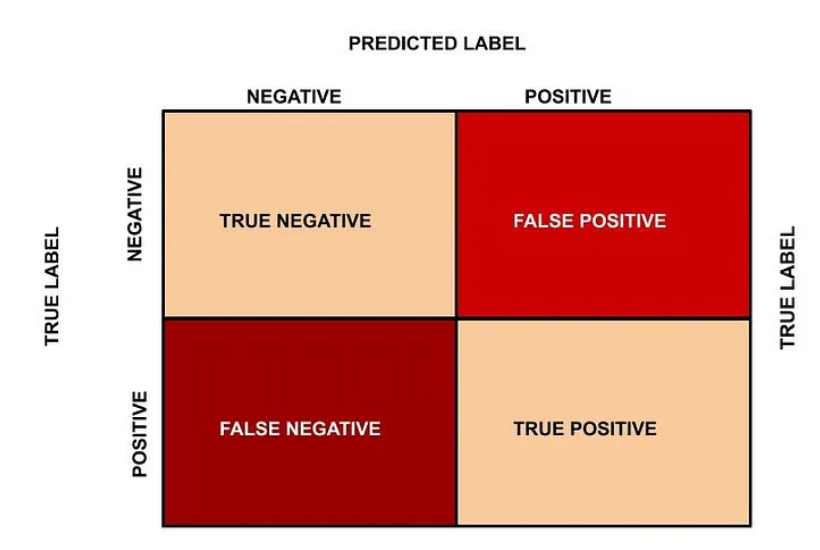

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Precision : 0.9739130434782609
Recall    : 0.7619047619047619
F1-score  : 0.8549618320610687


In [36]:
from sklearn.pipeline import Pipeline
def prepare_model(algorithm, x_train, y_train): 
    model = Pipeline(steps=[('algorithm', algorithm)])
    model.fit(x_train, y_train)
    return model

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import time

algorithms = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), 
            DecisionTreeClassifier(), LogisticRegression()]


names = []
times = []
recall = []
f_score = []
a=0
b=0

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, x_train, y_train)
    pred = model.predict(x_test)
    end_time = time.time()
    times.append(end_time - start_time)
    recall.append(recall_score(y_test, pred))
    f_score.append(f1_score(y_test, pred))
    c_mat = confusion_matrix(y_test, pred)
    print("\nFor algorithm", algorithm, "********")
    print("Recall:", recall[a], "F1 score:", f_score[b])
    print("Confusion matrix:\n", c_mat)
    a+=1
    b+=1

##print('Recall and F1 scores in Algorithms') 
##results_dict = {'Algorithm': names, 'Recall': recall, 'F1 score': f_score, 'Time in sec': times}
##pd.DataFrame(results_dict).sort_values(by='F1 score', ascending=False)



For algorithm RandomForestClassifier() ********
Recall: 1.0 F1 score: 0.9671052631578947
Confusion matrix:
 [[  0  20]
 [  0 294]]

For algorithm AdaBoostClassifier() ********
Recall: 0.9863945578231292 F1 score: 0.9602649006622516
Confusion matrix:
 [[  0  20]
 [  4 290]]

For algorithm GradientBoostingClassifier() ********
Recall: 0.9897959183673469 F1 score: 0.9619834710743802
Confusion matrix:
 [[  0  20]
 [  3 291]]

For algorithm DecisionTreeClassifier() ********
Recall: 0.9387755102040817 F1 score: 0.9387755102040817
Confusion matrix:
 [[  2  18]
 [ 18 276]]

For algorithm LogisticRegression() ********
Recall: 1.0 F1 score: 0.9671052631578947
Confusion matrix:
 [[  0  20]
 [  0 294]]


In [38]:
##Low F1 score
## A low F1 score indicates poor overall performance of a binary classification model and can be attributed to various factors, including:

##Imbalanced data: In case of an imbalanced dataset, with one class being represented significantly more frequently than the other, the model may struggle to learn to distinguish the minority class, resulting in poor performance and a low score.
##Insufficient data: Inadequate dataset size or insufficient representative examples of each class can hinder the model’s ability to learn a robust representation.
##Inappropriate model selection: Score might be low if the chosen model is not suitable for the specific task or if it is not properly tuned.
##Inadequate features: If the selected features fail to capture the relevant information for the task, the model may struggle to learn meaningful patterns from the data.

## Balancing the data using SMOTE

In [39]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler


In [40]:
smote=SMOTE()

In [41]:
x_train_smote, y_train_smote=smote.fit_resample(x_train, y_train)

In [42]:
y_train_smote.value_counts()

1    1169
0    1169
Name: Pass/Fail, dtype: int64

In [43]:
lr_smote=lr.fit(x_train_smote, y_train_smote)
y_pred_smote=lr_smote.predict(x_test)

In [44]:
precision = precision_score(y_test, y_pred_smote)
print("Precision :", precision)
recall = recall_score(y_test, y_pred_smote)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred_smote)
print("F1-score  :", F1_score)
cm = confusion_matrix(y_test,y_pred_smote)
print(cm)

Precision : 0.9733333333333334
Recall    : 0.7448979591836735
F1-score  : 0.8439306358381503
[[ 14   6]
 [ 75 219]]


In [45]:
algorithms = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), 
            DecisionTreeClassifier(), LogisticRegression()]


names = []
times = []
recall = []
f_score = []
a=0
b=0

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    
    model = prepare_model(algorithm, x_train_smote, y_train_smote)
    pred_smote = model.predict(x_test)
    
    recall.append(recall_score(y_test, pred_smote))
    f_score.append(f1_score(y_test, pred_smote))
    c_mat = confusion_matrix(y_test,pred_smote)
    print("***************")
    print("For algorithm :", algorithm)
    print("Recall:", recall[a], "     F1 score:", f_score[b])
    print("Confusion matrix:\n", c_mat)
    a+=1
    b+=1

***************
For algorithm : RandomForestClassifier()
Recall: 0.9387755102040817      F1 score: 0.937181663837012
Confusion matrix:
 [[  1  19]
 [ 18 276]]
***************
For algorithm : AdaBoostClassifier()
Recall: 0.7687074829931972      F1 score: 0.8480300187617261
Confusion matrix:
 [[  7  13]
 [ 68 226]]
***************
For algorithm : GradientBoostingClassifier()
Recall: 0.8367346938775511      F1 score: 0.8848920863309352
Confusion matrix:
 [[  4  16]
 [ 48 246]]
***************
For algorithm : DecisionTreeClassifier()
Recall: 0.8673469387755102      F1 score: 0.907473309608541
Confusion matrix:
 [[  7  13]
 [ 39 255]]
***************
For algorithm : LogisticRegression()
Recall: 0.7448979591836735      F1 score: 0.8439306358381503
Confusion matrix:
 [[ 14   6]
 [ 75 219]]
